In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("IS507E_IMF_Report__2021_.xlsx")
df.head()

,ID_Num,Country,Region,IMF_Nigo,Step_Nego,Gov_Spending,Business_Freedom,Monetary_Freedom,Investment_Freedom,Population_Millions,GDP_Billions_PPP,Unemployment_Rate,Inflation_Rate,Public_Debt_rate_GDP
0,1,Afghanistan,Asia-Pacific,0,Step4,80.3,49.2,76.7,10.0,35.5,69.6,8.8,5.0,7.3
1,2,Albania,Europe,1,Step1,73.9,69.3,81.5,70.0,2.9,36.0,13.9,2.0,71.2
2,3,Algeria,Middle East and North Africa,0,Step4,48.7,61.6,74.9,30.0,41.5,632.9,10.0,5.6,25.8
3,4,Angola,Sub-Saharan Africa,0,Step4,80.7,55.7,55.4,30.0,28.2,190.3,8.2,31.7,65.3
4,5,Argentina,Americas,0,Step2,49.5,56.4,60.2,55.0,44.1,920.2,8.7,25.7,52.6


# Step 1 Data Cleaning
Preparing the data before analysis

In [3]:
df.isnull().sum() #check the null value

ID_Num                  0
Country                 0
Region                  0
IMF_Nigo                0
Step_Nego               5
Gov_Spending            2
Business_Freedom        1
Monetary_Freedom        3
Investment_Freedom      4
Population_Millions     1
GDP_Billions_PPP        4
Unemployment_Rate       1
Inflation_Rate          4
Public_Debt_rate_GDP    1
dtype: int64

In [4]:
df.dtypes #check the type of the data

ID_Num                    int64
Country                  object
Region                   object
IMF_Nigo                  int64
Step_Nego                object
Gov_Spending            float64
Business_Freedom        float64
Monetary_Freedom        float64
Investment_Freedom      float64
Population_Millions     float64
GDP_Billions_PPP        float64
Unemployment_Rate       float64
Inflation_Rate          float64
Public_Debt_rate_GDP    float64
dtype: object

In [5]:
df['Step_Nego'].unique()

array(['Step4', 'Step1', 'Step2', 'Step3', nan], dtype=object)

In [6]:
df['Step_Nego']= df['Step_Nego'].fillna(df['Step_Nego'].mode()[0])

In [7]:
df.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IMF_Nigo                0
Step_Nego               0
Gov_Spending            2
Business_Freedom        1
Monetary_Freedom        3
Investment_Freedom      4
Population_Millions     1
GDP_Billions_PPP        4
Unemployment_Rate       1
Inflation_Rate          4
Public_Debt_rate_GDP    1
dtype: int64

In [8]:
column = ['Gov_Spending','Business_Freedom','Monetary_Freedom','Investment_Freedom',
          'Population_Millions','GDP_Billions_PPP','Unemployment_Rate','Inflation_Rate','Public_Debt_rate_GDP']

In [9]:
# use the mean of each step to fill in each of the null value
Step = df['Step_Nego'].unique()

for i in Step:
    print(i)
    print("****************")
    
    df_Step = df.loc[(df['Step_Nego'] == i)]

    for col in column:
        avrg = df_Step[col].mean()
        df.loc[(df['Step_Nego'] == i) & (df[col].isnull()), col] = avrg
        print(avrg)


Step4
****************
69.55681818181819
62.2
76.74545454545454
56.27906976744186
94.72045454545454
1527.706976744186
7.054545454545458
4.088636363636363
56.1279069767442
Step1
****************
62.754054054054045
65.47567567567569
77.22777777777779
61.111111111111114
17.541666666666664
424.1611111111111
8.377777777777778
3.3916666666666653
58.72702702702704
Step2
****************
62.688095238095244
67.53023255813955
75.66829268292685
57.80487804878049
30.48837209302325
543.5651162790698
6.395348837209301
29.89761904761905
56.11627906976742
Step3
****************
66.55918367346938
63.05102040816328
75.02799999999998
59.84
23.581999999999997
453.0416666666667
7.535999999999999
6.295833333333334
55.982000000000006


In [10]:
df.fillna(df_Step.mean(), inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_19144\1932372838.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df_Step.mean(), inplace = True)


In [11]:
df.isnull().sum()

ID_Num                  0
Country                 0
Region                  0
IMF_Nigo                0
Step_Nego               0
Gov_Spending            0
Business_Freedom        0
Monetary_Freedom        0
Investment_Freedom      0
Population_Millions     0
GDP_Billions_PPP        0
Unemployment_Rate       0
Inflation_Rate          0
Public_Debt_rate_GDP    0
dtype: int64

In [12]:
# show all columns unique values
for column in df.columns:
    print(column, df[column].unique())

ID_Num [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174]
Country ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgari

In [13]:
# using the loop(for... in ...)
dregion = df['Region'].unique()
column = ['Unemployment_Rate','Inflation_Rate']
for i in dregion :
    print(i)
    print("******************")
    
    df_dregion = df.loc[(df['Region']==i)]
    min_un = df_dregion['Unemployment_Rate'].min()
    min_in = df_dregion['Inflation_Rate'].min()
    Min = {'Unemployment_Rate': min_un, 'Inflation_Rate' : min_in}
    print(Min)
    

Asia-Pacific
******************
{'Unemployment_Rate': 0.2, 'Inflation_Rate': -0.4}
Europe
******************
{'Unemployment_Rate': 0.5, 'Inflation_Rate': 0.3}
Middle East and North Africa
******************
{'Unemployment_Rate': 0.1, 'Inflation_Rate': -0.9}
Sub-Saharan Africa
******************
{'Unemployment_Rate': 0.4, 'Inflation_Rate': -0.9}
Americas
******************
{'Unemployment_Rate': 2.6, 'Inflation_Rate': 0.1}


In [14]:
#Function
column =df[['Step_Nego', 'Gov_Spending', 'Business_Freedom', 'Monetary_Freedom']]
def max_count(column):
    column_max= column.max()
    max_value= column[column_max]
    return len(max_value)

# Step 2 : Data Visualization

In [15]:
# Bar chart
df['Max_Inflation_Rate'] = df['Inflation_Rate'].max()

In [16]:
df ['avg_Unin'] = df[['Unemployment_Rate', 'Max_Inflation_Rate']].mean(1)

In [17]:
graph1 = pd.pivot_table(df,index=['Region'],
                       values = ['avg_Unin'])
graph1

,avg_Unin
Region,
Americas,547.650000
Asia-Pacific,545.808472
Europe,548.136047
Middle East and North Africa,547.285714
Sub-Saharan Africa,547.983696


In [18]:
graph1 =graph1.reset_index()
graph1

,Region,avg_Unin
0,Americas,547.650000
1,Asia-Pacific,545.808472
2,Europe,548.136047
3,Middle East and North Africa,547.285714
4,Sub-Saharan Africa,547.983696


Text(0.5, 1.0, 'Average of Unemployment Rate and max_Inflation Rate by Region')

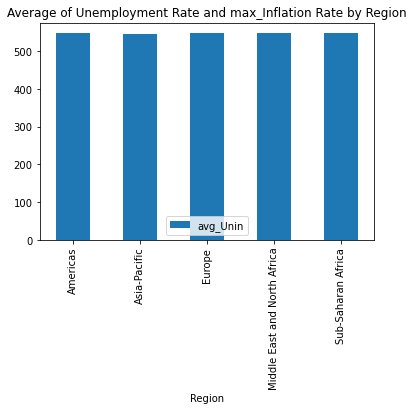

In [19]:
graph1.plot(x='Region', y='avg_Unin', kind='bar')
plt.title('Average of Unemployment Rate and max_Inflation Rate by Region')

In [20]:
# pie chart
max_spend=df.groupby('Step_Nego')['Gov_Spending'].max().reset_index()
max_spend

,Step_Nego,Gov_Spending
0,Step1,95.6
1,Step2,91.4
2,Step3,96.6
3,Step4,96.5


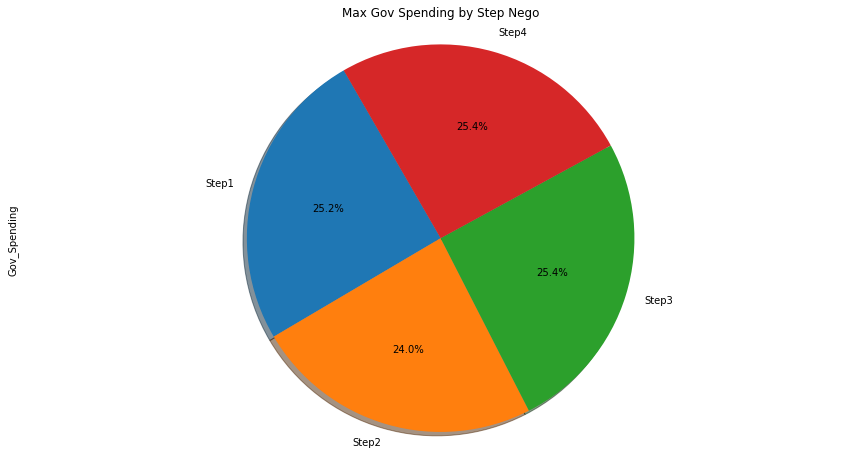

In [21]:
max_spend['Gov_Spending'].plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=120,     # start angle 90° (Africa)
                            labels = max_spend['Step_Nego'],
                            shadow=True,       # add shadow      
                            )
 
plt.title('Max Gov Spending by Step Nego' )
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()

In [22]:
#histogram
Each_GDP=df[['Country','Public_Debt_rate_GDP']]
Each_GDP

,Country,Public_Debt_rate_GDP
0,Afghanistan,7.3
1,Albania,71.2
2,Algeria,25.8
3,Angola,65.3
4,Argentina,52.6
...,...,...
169,Vanuatu,48.4
170,Venezuela,34.9
171,Vietnam,58.2
172,Zambia,62.2


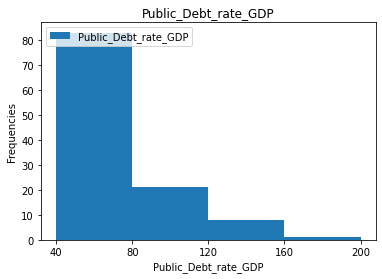

In [23]:
dgdp = df ['Public_Debt_rate_GDP'].tolist()

Public_Debt_rate_GDP = [40, 80, 120, 160, 200]

plt.hist(dgdp, Public_Debt_rate_GDP, label = 'Public_Debt_rate_GDP')

plt.xlabel('Public_Debt_rate_GDP')
plt.ylabel('Frequencies')
plt.legend(loc='upper left')
plt.xticks(Public_Debt_rate_GDP)
plt.title('Public_Debt_rate_GDP')
plt.show()

In [24]:
df.Step_Nego[df.Step_Nego == 'Step1'] = 5
df.Step_Nego[df.Step_Nego == 'Step2'] = 5
df.Step_Nego[df.Step_Nego == 'Step3'] = 10
df.Step_Nego[df.Step_Nego == 'Step4'] = 10

C:\Users\user\AppData\Local\Temp\ipykernel_19144\1721072871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Step_Nego[df.Step_Nego == 'Step1'] = 5
C:\Users\user\AppData\Local\Temp\ipykernel_19144\1721072871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Step_Nego[df.Step_Nego == 'Step2'] = 5
C:\Users\user\AppData\Local\Temp\ipykernel_19144\1721072871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Step_Nego[df.Ste

In [25]:
df['Step_IndexValue'] =df['Step_Nego']

In [26]:
df['Business_IndexValue'] = df['Gov_Spending']*(df['Step_IndexValue']+df['Public_Debt_rate_GDP'])
df['Freedom_IndexValue'] = df['Business_Freedom'] + df['Monetary_Freedom'] + df['Investment_Freedom'] * (1+df['Step_IndexValue'])

In [27]:
df['IMF_Index'] = df['Business_IndexValue'] * (df['Step_IndexValue'] + df['Public_Debt_rate_GDP'])
df['IMF_Index']

0       24032.987
1      429095.916
2       62415.868
3      457576.263
4       164229.12
          ...    
169    154269.396
170     92495.781
171    295973.184
172    417548.484
173     582184.72
Name: IMF_Index, Length: 174, dtype: object

In [59]:
IMF = df[['Country', 'Region', 'IMF_Nigo', 'Step_Nego','IMF_Index',]]
IMF['IMF_Index'] = IMF['IMF_Index'].astype(int)
IMF.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19144\2052116081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMF['IMF_Index'] = IMF['IMF_Index'].astype(int)


,Country,Region,IMF_Nigo,Step_Nego,IMF_Index
0,Afghanistan,Asia-Pacific,0,10,24032
1,Albania,Europe,1,5,429095
2,Algeria,Middle East and North Africa,0,10,62415
3,Angola,Sub-Saharan Africa,0,10,457576
4,Argentina,Americas,0,5,164229


In [29]:
IMF.sort_values(by=['IMF_Index']).nlargest(n=5, columns=['IMF_Index'])

TypeError: Column 'IMF_Index' has dtype object, cannot use method 'nlargest' with this dtype

# Step 3 Build the Model

In [31]:
# Supervised Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [32]:
X = df[['Business_Freedom','Monetary_Freedom','Investment_Freedom','Unemployment_Rate'
        ,'Inflation_Rate','Public_Debt_rate_GDP']]
y = df["IMF_Nigo"]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [34]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

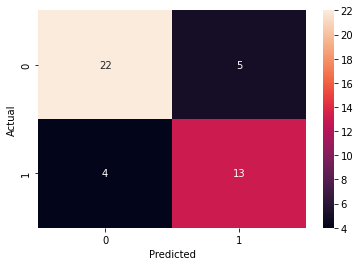

In [35]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [36]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7954545454545454


In [37]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print(X_test) #test dataset (without the actual outcome)
print("************************************************")
print (y_pred) #predicted values

     Business_Freedom  Monetary_Freedom  Investment_Freedom  \
54           59.20000         73.700000           50.000000   
147          52.10000         56.900000            5.000000   
63           56.50000         66.300000           70.000000   
55           48.60000         60.800000           35.000000   
122          62.20000         70.000000           25.000000   
101          53.80000         81.600000           65.000000   
7            74.90000         81.500000           90.000000   
156          50.40000         79.100000           65.000000   
130          78.40000         65.100000           30.000000   
89           77.50000         81.100000           85.000000   
139          44.90000         65.000000           60.000000   
144          63.05102         75.200000           45.000000   
5            78.30000         77.800000           75.000000   
97           47.30000         72.400000           55.000000   
164          79.90000         80.900000           40.00

In [38]:
#randam Forest
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=20)
print(X_train)
print(X_test)

     Business_Freedom  Monetary_Freedom  Investment_Freedom  \
41               60.7              78.5                75.0   
153              46.6              70.4                55.0   
134              77.0              83.5                55.0   
57               89.4              84.8                85.0   
2                61.6              74.9                30.0   
..                ...               ...                 ...   
148              48.3              56.0                40.0   
137              53.3              78.2                60.0   
156              50.4              79.1                65.0   
15               61.8              78.7                55.0   
99               83.9              78.6                60.0   

     Unemployment_Rate  Inflation_Rate  Public_Debt_rate_GDP  
41                11.2             1.1                  78.4  
153                2.2             5.3                  38.2  
134                8.2             1.3                

In [39]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=10, random_state=30)

In [40]:
#fit data
model.fit(X_train, Y_train)

#Predict our dataset
prediction_test = model.predict(X_test)
print(prediction_test)
len(prediction_test)

[1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0]


70

In [41]:
#find our prediction accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test, prediction_test))

#find what parameters or features occurs in our model
features_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False) 
print(feature_imp)

Accuracy =  0.9
Investment_Freedom      0.427841
Business_Freedom        0.316115
Monetary_Freedom        0.094434
Public_Debt_rate_GDP    0.067755
Inflation_Rate          0.055903
Unemployment_Rate       0.037952
dtype: float64


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

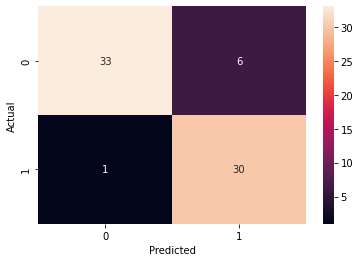

In [42]:
Y_pred = prediction_test
import seaborn as sn
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [43]:
# comment and compare


# 1)The accuracy of the logistic regression is 0.7 but Random Forest is 0.9, the result of Random Forest is more accuracy
# 2)In the headmap, we can see that logistic has less number than Random Forest in the predicted part of 1

In [44]:
#Unsupervised ML

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [46]:
Ml1 = df[['Business_Freedom','Investment_Freedom']]
Ml1.head()

,Business_Freedom,Investment_Freedom
0,49.2,10.0
1,69.3,70.0
2,61.6,30.0
3,55.7,30.0
4,56.4,55.0


Text(0.5, 1.0, 'No Clusters Assigned')

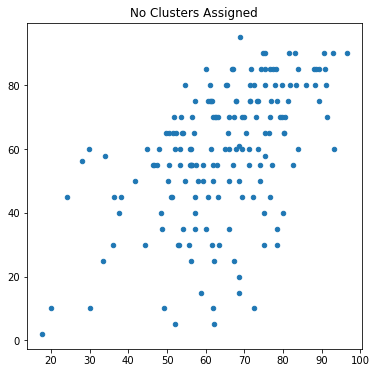

In [47]:
# Plot the random blub data
plt.figure(figsize=(6, 6))
plt.scatter(Ml1["Business_Freedom"], Ml1['Investment_Freedom'], s=20)
plt.title(f"No Clusters Assigned")

In [48]:
kmeans = KMeans(n_clusters=4).fit(Ml1)
centroids = kmeans.cluster_centers_

print(centroids)

[[49.44186047 55.90892902]
 [74.77230769 79.07692308]
 [54.81       23.23333333]
 [71.81252834 54.8309997 ]]


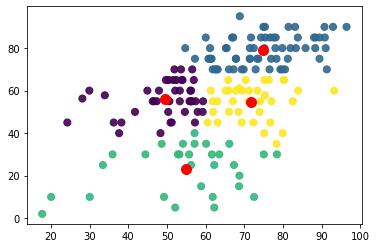

In [49]:
plt.scatter(Ml1['Business_Freedom'], Ml1['Investment_Freedom'], c= kmeans.labels_.astype(float), s=50, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)

In [50]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Ml1)
    distortions.append(kmeanModel.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


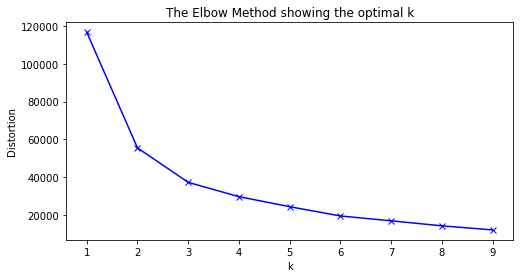

In [51]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [52]:
Ml1 = {'X':df['Business_Freedom'], 'y':df['Investment_Freedom']}

For n_clusters = 2 The average silhouette_score is : 0.9440456514285904
For n_clusters = 3 The average silhouette_score is : 0.39928099758631086
For n_clusters = 4 The average silhouette_score is : 0.27672986600305555
For n_clusters = 5 The average silhouette_score is : 0.24889630677357363
For n_clusters = 6 The average silhouette_score is : 0.2277478781878104


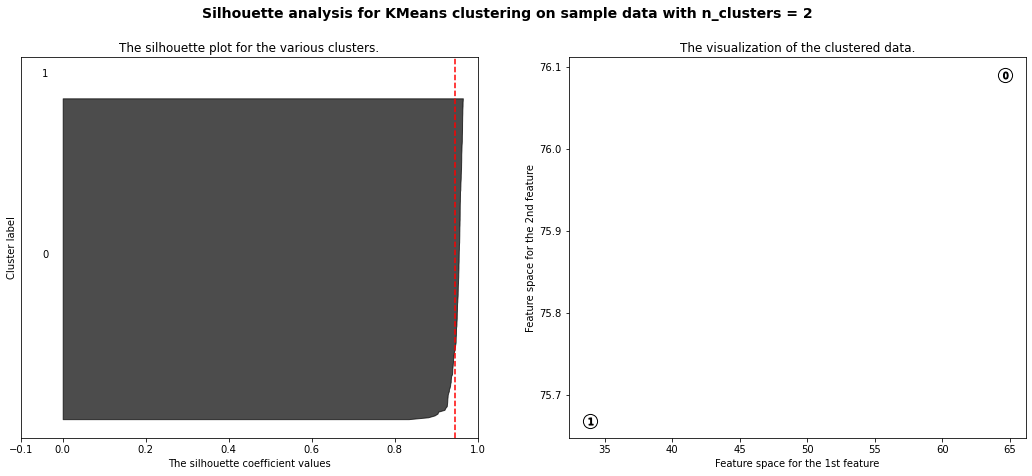

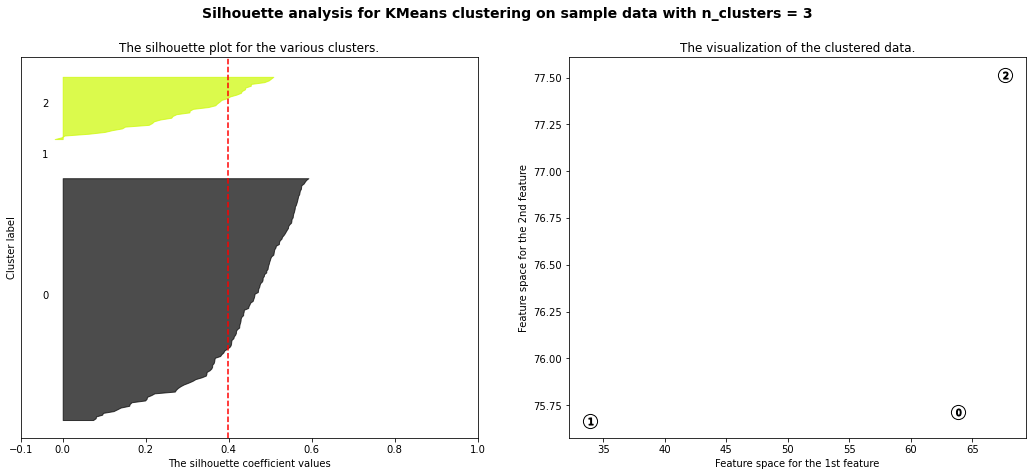

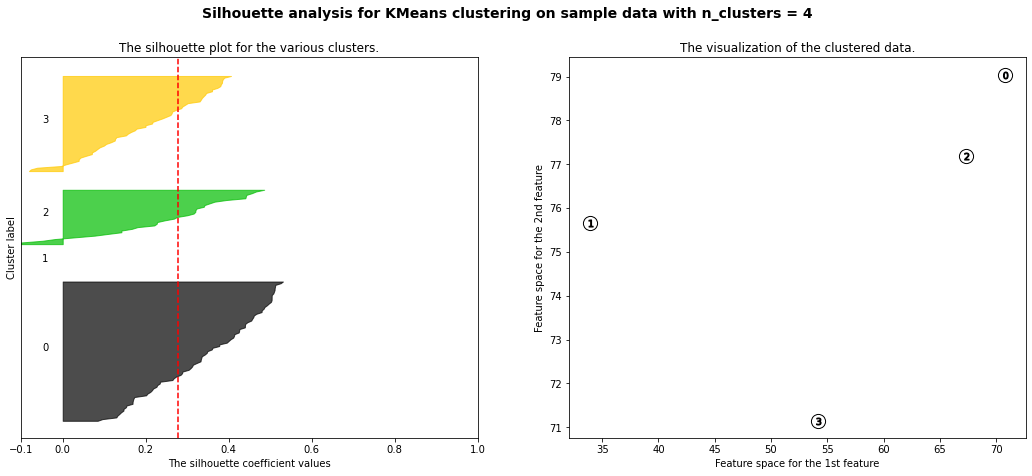

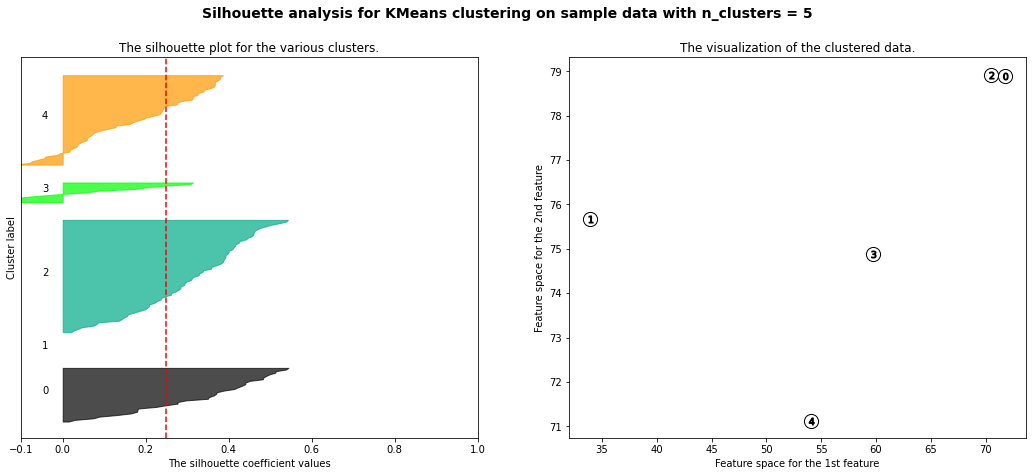

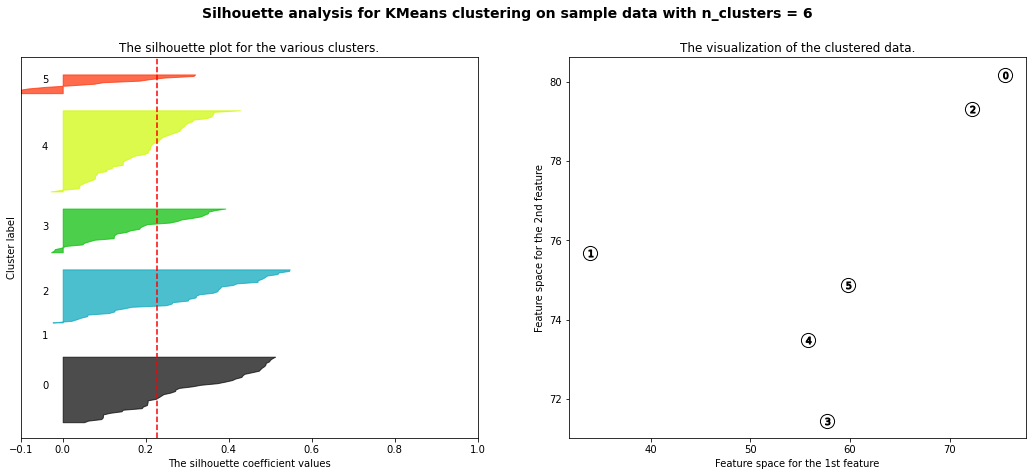

In [53]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

   
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
   
  # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    


plt.show();
    
      
    